In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# oread_csv문자./krx.csv의미한다
# Symbol같은 경우 앞에 0이 들어가 있기 때문에 숫자로 변환되면서 0이 누락되는 것을 방지하기 위함
df = pd.read_csv('krx.csv', dtype={'Symbol':object})
df.shape


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)

Text(0.5, 1.0, '섹터별 빈도수')

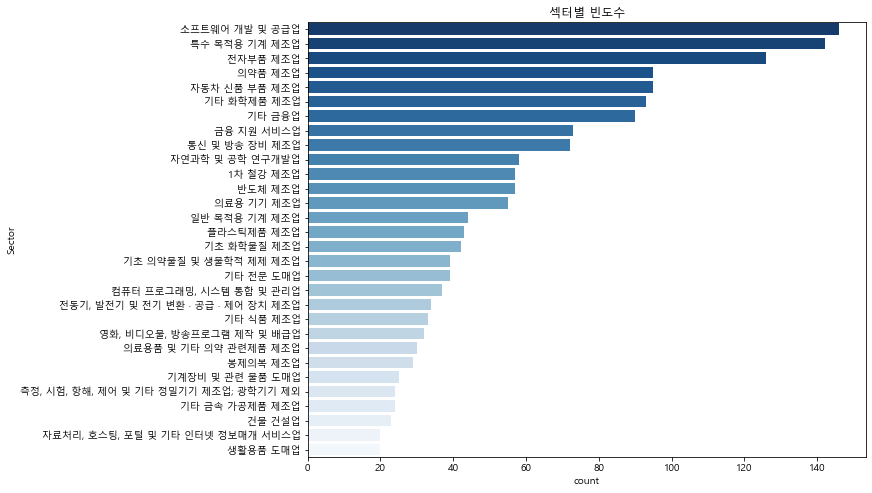

In [19]:
# 상위 30개 많은 값
sector_count_top = df['Sector'].value_counts().head(30)

df_sector_30 = df[df['Sector'].isin(sector_count_top.index)]

plt.figure(figsize=(10,8))
sns.countplot(data=df_sector_30, y='Sector', palette='Blues_r',
              order=sector_count_top.index).set_title('섹터별 빈도수')